HOA | 6.2
--- | ---
Name: | **Feliciano, Kurt Martin**<br>
Course and Section: | **CPE 019 - CPE32S3**<br>
Instructor: | **Engr. Roman Richard**<br>
<hr> | <hr>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(769, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
332,2,87,58,16,52,32.7,0.166,25,0
228,3,162,52,38,0,37.2,0.652,24,1
133,3,170,64,37,225,34.5,0.356,30,1
138,0,93,60,25,92,28.7,0.532,22,0
529,0,117,66,31,188,30.8,0.493,22,0


In [ ]:
diabetes_df.dtypes

times_pregnant            object
glucose_tolerance_test    object
blood_pressure            object
skin_thickness            object
insulin                   object
bmi                       object
pedigree_function         object
age                       object
has_diabetes              object
dtype: object

In [ ]:
diabetes_df = diabetes_df.drop(index=0)
diabetes_df = diabetes_df.astype(float)

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 15ms/step - loss: 0.7236 - accuracy: 0.5365 - val_loss: 0.7019 - val_accuracy: 0.5625
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.5608 - val_loss: 0.6836 - val_accuracy: 0.5625
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.5799 - val_loss: 0.6681 - val_accuracy: 0.5885
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6666 - accuracy: 0.6146 - val_loss: 0.6549 - val_accuracy: 0.6354
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6250 - val_loss: 0.6436 - val_accuracy: 0.6615
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6424 - val_loss: 0.6337 - val_accuracy: 0.6615
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6300 - accuracy: 0.6545 - val_loss: 0.6249 - val_accuracy: 0.6719
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = np.argmax(model.predict(X_test_norm), axis=-1)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.46787018],
       [0.61292845],
       [0.28229532],
       [0.38171515],
       [0.15860091],
       [0.5172066 ],
       [0.02267567],
       [0.24578536],
       [0.9350923 ],
       [0.19449326]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.819


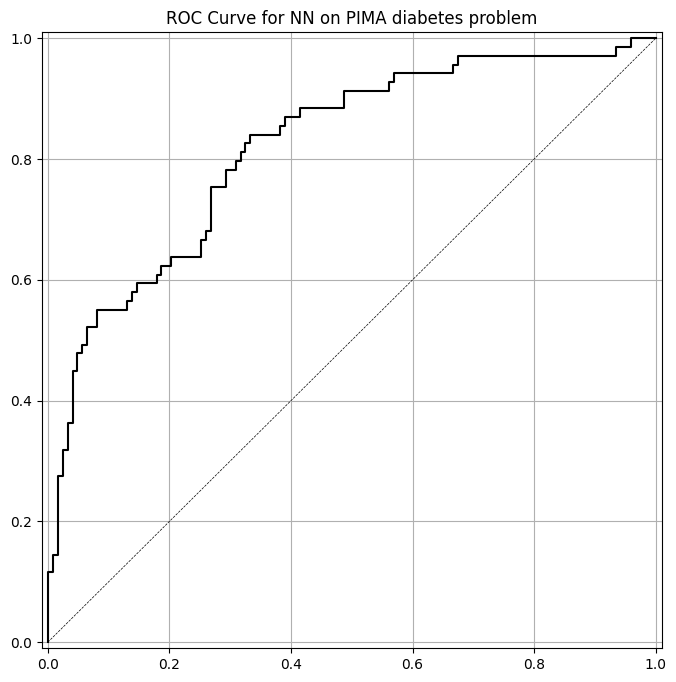

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

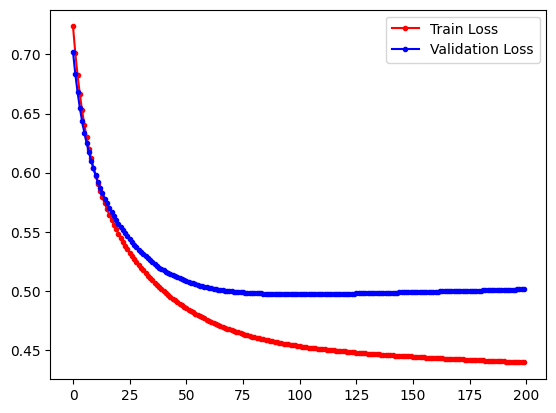

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

# Before it even reaches 25 epochs, it has started to diverge gradually.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
# Build a model with 2 hidden layers, each with 6 nodes
supple_model  = Sequential([
    # Use the "relu" activation functoin for the hidden layers
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation='relu'),
    # and "sigmoid" for the final layer
    Dense(1, activation="sigmoid")
])

supple_model.summary()
# Use a learning rate of 0.003
supple_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
# and train for 1500 epochs
run_hist_2 = supple_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500,batch_size=500)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/1500
2/2 [==============================] - 2s 333ms/step - loss: 0.6700 - accuracy: 0.6146 - val_loss: 0.6687 - val_accuracy: 0.6302
Epoch 2/1500
2/2 [==============================] - 0s 48ms/step - loss: 0.6693 - accuracy: 0.6198 - val_loss: 0.6679 - val_accuracy: 0.6250
Epoch 3/1500
2/2 [==============================] - 0s 32ms/step - loss: 0.6685 - accuracy: 0.6198 - val_loss: 0.6672 - val_accuracy: 0.6406
Epoch 4/1500
2/2 [==============================] - 0s 34ms/step - loss: 0.6677 - accuracy: 0.6267 - val_loss: 0.6664 - val_accuracy: 0.6250
Epoch 5/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.6668 - accuracy: 0.6319 - val_loss: 0.6656 - val_accuracy: 0.6354
Epoch 6/1500
2/2 [==============================] - 0s 35ms/step - loss: 0.6660 - accuracy: 0.6302 - val_loss: 0.6650 - val_accuracy: 0.6406
Epoch 7/1500
2/2 [==============================] - 0s 53ms/step - loss: 0.6653 - accuracy: 0.6372 - val_loss: 0.6642 - val_accuracy: 0.6406
Epoch 8/1500

In [ ]:
# same steps from procedure moving forward
y_pred_class_nn_2 = np.argmax(supple_model.predict(X_test_norm), axis=-1)
y_pred_prob_nn_2 = supple_model.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

accuracy is 0.641
roc-auc is 0.826


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

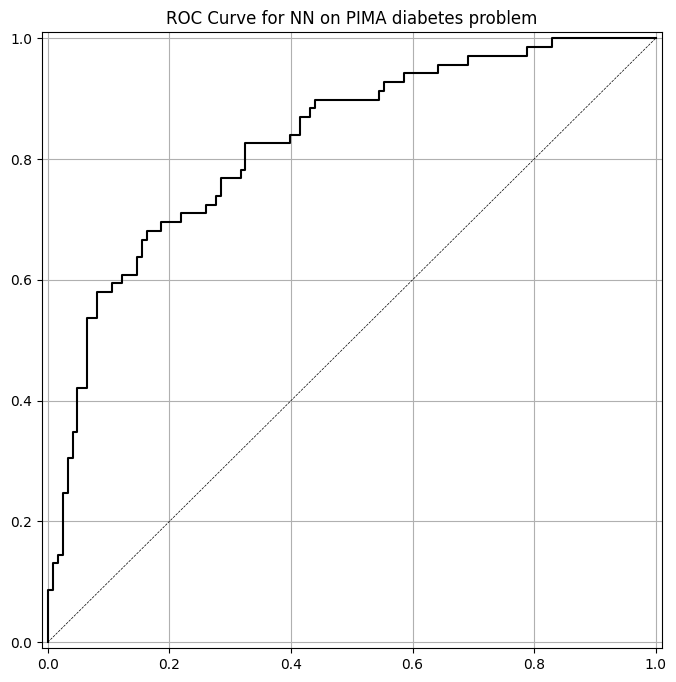

In [ ]:
plot_roc(y_test, y_pred_prob_nn_2, 'NN')
run_hist_2.history.keys()

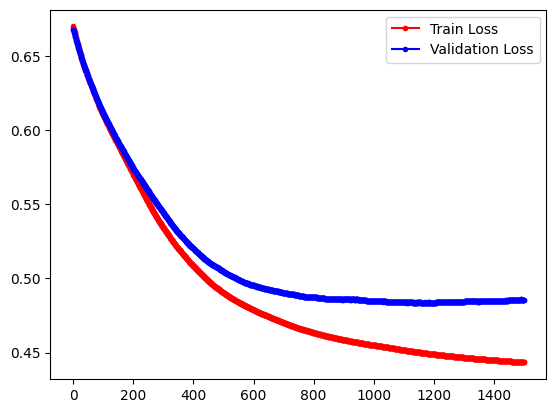

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

<h3><b> == Testing out different LRs and epochs ==

<h4> LR : 0.3 // Epochs : 250

In [ ]:
# Build a model with 2 hidden layers, each with 6 nodes
supple_model_test  = Sequential([
    # Use the "relu" activation functoin for the hidden layers
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation='relu'),
    # and "sigmoid" for the final layer
    Dense(1, activation="sigmoid")
])

supple_model_test.summary()
# Use a learning rate of 0.3
supple_model_test.compile(SGD(lr = .3), "binary_crossentropy", metrics=["accuracy"])
# and train for 250 epochs
run_hist_3 = supple_model_test.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=250,batch_size=500)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 6)                 54        
                                                                 
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/250
2/2 [==============================] - 1s 190ms/step - loss: 0.7917 - accuracy: 0.6389 - val_loss: 0.8348 - val_accuracy: 0.6198
Epoch 2/250
2/2 [==============================] - 0s 34ms/step - loss: 0.7882 - accuracy: 0.6389 - val_loss: 0.8303 - val_accuracy: 0.6198
Epoch 3/250
2/2 [==============================] - 0s 31ms/step - loss: 0.7842 - accuracy: 0.6389 - val_loss: 0.8253 - val_accuracy: 0.6146
Epoch 4/250
2/2 [==============================] - 0s 50ms/step - loss: 0.7800 - accuracy: 0.6389 - val_loss: 0.8217 - val_accuracy: 0.6146
Epoch 5/250
2/2 [==============================] - 0s 32ms/step - loss: 0.7769 - accuracy: 0.6389 - val_loss: 0.8178 - val_accuracy: 0.6146
Epoch 6/250
2/2 [==============================] - 0s 32ms/step - loss: 0.7734 - accuracy: 0.6389 - val_loss: 0.8134 - val_accuracy: 0.6146
Epoch 7/250
2/2 [==============================] - 0s 41ms/step - loss: 0.7696 - accuracy: 0.6389 - val_loss: 0.8093 - val_accuracy: 0.6146
Epoch 8/250
2/2 [==

In [ ]:
# same steps from procedure moving forward
y_pred_class_nn_3 = np.argmax(supple_model_test.predict(X_test_norm), axis=-1)
y_pred_prob_nn_3 = supple_model_test.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

accuracy is 0.641
roc-auc is 0.714


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

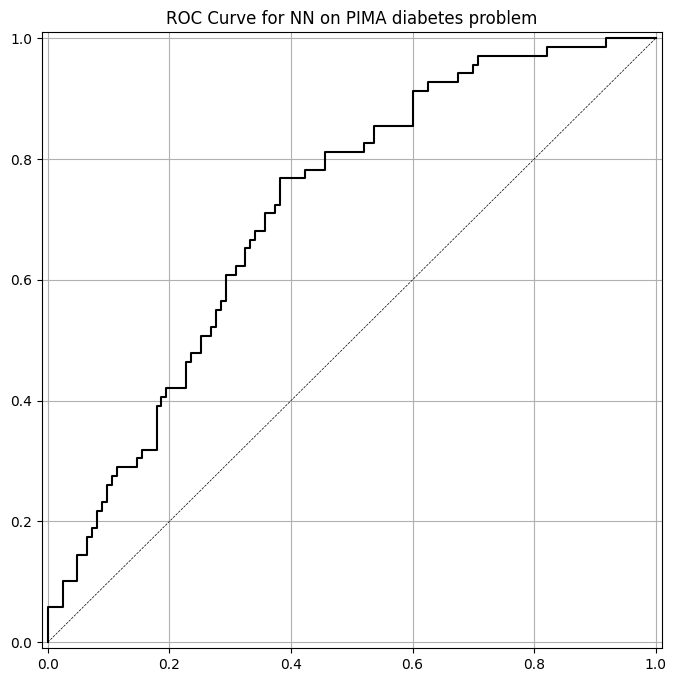

In [ ]:
plot_roc(y_test, y_pred_prob_nn_3, 'NN')
run_hist_3.history.keys()

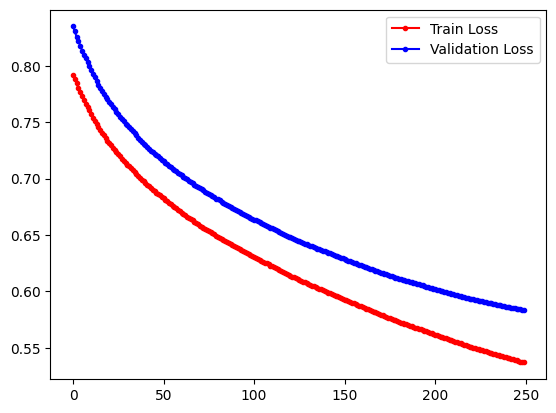

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Conclusion

After performing this activity, I have learned about the interrelatedness of the parameters that come into play in training neural networks, such as epoch and learning rate. Knowing the importance of these parameters is a must, as we cannot solely rely on the graphs we plot, as they can be deceiving and provide good results even if that isn't really the case. We should know how to adjust them accordingly to make sure that we are getting actual good results, and that's what makes good models.